# Test VAE Predictions

#### Import libraries

In [52]:
import numpy as np

import os
import keras
from keras import losses
from keras.models import load_model
from keras.metrics import binary_crossentropy
from keras.layers import Lambda, Input, Dense
from keras.models import Model
from keras.utils import plot_model
from keras import backend as K
from keras.optimizers import RMSprop
from keras.metrics import binary_crossentropy

#path
import sys
sys.path.append("../")

import config
from src.models import train_model
from src.models.train_model import *

import matplotlib.pyplot as plt

#### Load data

In [53]:
X_train = np.load(os.path.join(config.DATA_PREPROCESSED_DIR, "X_test.npy"))
y_train = np.load(os.path.join(config.DATA_PREPROCESSED_DIR, "y_test.npy"))


X_test = np.load(os.path.join(config.DATA_PREPROCESSED_DIR, "X_test.npy"))
y_test = np.load(os.path.join(config.DATA_PREPROCESSED_DIR, "y_test.npy"))

input_shape = X_test[0].shape
original_dim = X_test[0].shape

In [54]:
os.listdir(config.MODEL_DIR)

['normalizer.h5', '.gitkeep', 'classifier99.h5', 'VAE.hdf5', '.gitignore']

In [55]:
inputs = Input(shape=input_shape, name='encoder_input')
encoder, z_mean, z_log_var = encoder_model(inputs)

# Initialize decoder
decoder = decoder_model(original_dim)

In [56]:
def vae_loss(y_true, y_pred):
    xent_loss = binary_crossentropy(K.flatten(y_true), K.flatten(y_pred))
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    vae_loss = K.mean(xent_loss + kl_loss)
    return vae_loss

## Load trained vae

In [57]:
vae_path = os.path.join(config.MODEL_DIR,'VAE.hdf5')

In [58]:
vae = load_model(vae_path)

In [59]:
# Get decoder and encoder layers
encoder = vae.get_layer(name="encoder2")
decoder =vae.get_layer(name="decoder")

In [60]:
image_size = 30

In [61]:
encoder_input = np.expand_dims(X_test[0], axis = 0)

In [62]:
encoder_input.shape, encoder.input_shape

((1, 900), (None, 900))

In [63]:
latent = encoder.predict(encoder_input)

In [64]:
decoded_output = decoder.predict(latent)

In [65]:
X = X_train[0].reshape(1,900)

In [66]:
Y = y_train[0].reshape(1,900)

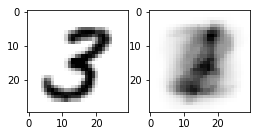

In [67]:
for img_index in range(1):
    
    plt.figure(figsize=(4,2))

    encoder_input = np.expand_dims(X[img_index], axis = 0)
    latent = encoder.predict(encoder_input)
    decoded_output = decoder.predict(latent)
    
    plt.subplot(1,2,1)
    img = np.reshape(Y[img_index], (image_size, image_size))
    plt.imshow(img, cmap = 'gray_r')

    plt.subplot(1,2,2)

    generated_img = np.reshape(decoded_output, (image_size, image_size))
    plt.imshow(generated_img, cmap = 'gray_r')
    plt.savefig('seven_reproduced.png')
    plt.show()
    

# Quality indicator

In [68]:
encoder_input = np.expand_dims(X_test[img_index], axis = 0)
mean, var, z = encoder.predict(encoder_input)
decoded_output = decoder.predict(mean)
 
plt.subplot(1,2,1)
img = np.reshape(y_test[img_index], (image_size, image_size))
plt.imshow(img, cmap = 'gray_r')

plt.subplot(1,2,2)

generated_img = np.reshape(decoded_output, (image_size, image_size))
plt.imshow(generated_img, cmap = 'gray_r')
plt.savefig('seven_reproduced.png')
plt.show()
    

ValueError: not enough values to unpack (expected 3, got 1)

In [112]:
y_true = img
y_pred = generated_img

In [129]:
xent_loss = binary_crossentropy(K.flatten(y_true), K.flatten(y_pred))
kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
my_vae_loss = K.mean(xent_loss + kl_loss)

<Figure size 432x288 with 0 Axes>

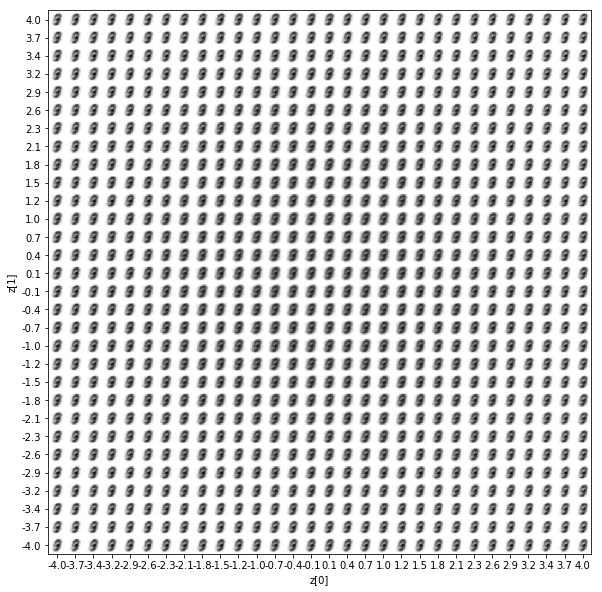

In [61]:
# display a 30x30 2D manifold of digits
n = 30
digit_size = 30
figure = np.zeros((digit_size * n, digit_size * n))
# linearly spaced coordinates corresponding to the 2D plot
# of digit classes in the latent space
grid_x = np.linspace(-4, 4, n)
grid_y = np.linspace(-4, 4, n)[::-1]


for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
start_range = digit_size // 2
end_range = n * digit_size + start_range + 1
pixel_range = np.arange(start_range, end_range, digit_size)
sample_range_x = np.round(grid_x, 1)
sample_range_y = np.round(grid_y, 1)
plt.xticks(pixel_range, sample_range_x)
plt.yticks(pixel_range, sample_range_y)
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.imshow(figure, cmap='gray_r')
plt.show()